# First steps with SYGMA

A simple stellar population is a population of stars born out of the same gas cloud.
This notebook explains how the basic chemical evolution parameter lead to the ejecta of stellar matter.
We will use (artificial) yields out of pure h1 yields. 
You can find the documentation <a href="http://nugrid.github.io/NuPyCEE/SPHINX/build/html/sygma.html">here</a>.

In [16]:
%matplotlib nbagg
import sygma as s
reload(s)
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import os
import sys

## 1. The initial mass function

### a) Basics

The IMF allows to calculate the number of stars $N_{12}$ in the mass interval [m1,m2] with

(I) $N_{12}$ = k_N $\int _{m1}^{m2} m^{-2.35} dm$ 

Where k_N is the normalization constant. It can be derived from the total amount of mass of the system $M_{tot}$
since the total mass $M_{12}$ in the mass interval above can be estimated with

(II) $M_{12}$ = k_N $\int _{m1}^{m2} m^{-1.35} dm$

With a total mass interval of [1,30] and $M_{tot}=1e11$ the $k_N$ can be derived:

$1e11 = k_N/0.35 * (1^{-0.35} - 30^{-0.35})$

The total number of stars $N_{tot}$ is then:

In [118]:
k_N=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)

In [119]:
N_tot=k_N/1.35 * (1**-1.35 - 30**-1.35) #(II)
print N_tot

36877281297.2


With a yield ejected of $0.1 Msun$, the total amount ejected is:

In [120]:
Yield_tot=0.1*N_tot
print Yield_tot/1e11

0.0368772812972


compared to the simulation:

In [124]:
import sygma as s
reload(s)
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,imf_type='salpeter',imf_bdys=[1,30],iniZ=0.02,hardsetZ=0.02,
           table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab_h1.ppn',pop3_table='yield_tables/popIII_h1.txt')
Yield_tot_sim=s1.history.ism_iso_yield[-1][0]
#% matplotlib inline

SYGMA run in progress..
   SYGMA run completed - Run time: 0.34s


Note: In this setup iniZ=0.02 refers to one of the metallicities available in the yield table file agb_and_massive_stars_h1.txt. Table headers in this table file such as 'Table: (M=1.0,Z=0.02)' indicate a metallicity of Z=0.02 and are selected as input. Since the metallicity of our peculiar yields is actually Z=0 (H only!) we use hardsetZ=0.02 to make the code work. We introduce hardsetZ only for this demonstration notebook and it should not be used.

Compare both results:

In [126]:
print Yield_tot_sim
print Yield_tot
print 'ratio should be 1 : ',Yield_tot_sim/Yield_tot

3687728129.72
3687728129.72
ratio should be 1 :  1.0


### b) Selection of different initial mass intervals

##### Select imf_bdys=[5,20]

In [132]:
k_N_5_20=1e11*0.35/ (5**-0.35 - 20**-0.35)
N_tot=k_N_5_20/1.35 * (5**-1.35 - 20**-1.35)
Yield_tot=0.1*N_tot

In [134]:
s1_5_20=s.sygma(iolevel=0,mgal=1e11,dt=1e9,tend=1.3e10,imf_type='salpeter',
           imf_bdys=[5,20],iniZ=0.02,hardsetZ=0.02,table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn')
Yield_tot_sim=s1_5_20.history.ism_iso_yield[-1][0]

SYGMA run in progress..
   SYGMA run completed - Run time: 0.25s


In [135]:
print 'Sould be 1:' ,Yield_tot_sim/Yield_tot

Sould be 1: 1.0


Now you could try to calculate your own total mass ejected for a mass range beween 1Msun and 5Msun.

### c) Distinguishing between massive and AGB sources:

Boundaries between AGB and massive for Z=0 (1e-4) at 8 (transitionmass parameter)

In [136]:
Yield_agb= ( k_N/1.35 * (1**-1.35 - 8.**-1.35) ) * 0.1
print Yield_agb
Yield_massive= ( k_N/1.35 * (8.**-1.35 - 30**-1.35) ) * 0.1

3500579704.75


In [137]:
print 'Should be 1:',Yield_agb/s1.history.ism_iso_yield_agb[-1][0]
print 'Should be 1:',Yield_massive/s1.history.ism_iso_yield_massive[-1][0]

Should be 1: 1.0
Should be 1: 1.0


### d) Time evolution

<IPython.core.display.Javascript object>


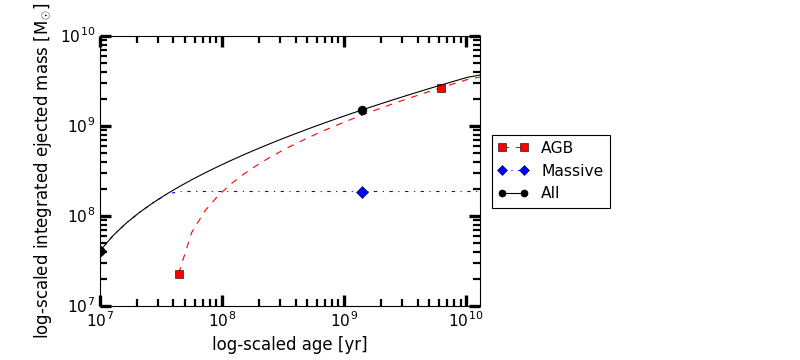

In [138]:
s1.plot_totmasses(fig=1,source='agb')
s1.plot_totmasses(fig=1,source='massive')
s1.plot_totmasses(fig=1,source='all')

For plotting, take the lifetimes/masses from the yield grid:

$
Initial Mass [Msun] & Age [yr]
1 & 5.67e9
1.65 & 1.211e9
2 & 6.972e8
3 & 2.471e8
4 & 1.347e8
5 & 8.123e7
6 & 5.642e7
7 & 4.217e7
12 & 1.892e7
15 & 1.381e7
20 & 9.895e6
25 & 7.902e6
$

In [139]:
s1_evol=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,
           imf_bdys=[1,30],iniZ=0,hardsetZ=0.0001,table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.34s


In [140]:
k_N_evol=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)

<IPython.core.display.Javascript object>


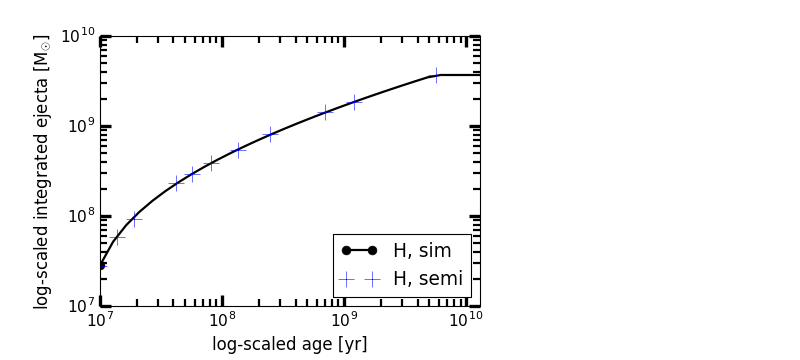

In [141]:
s1_evol.plot_mass(fig=2,specie='H',label='H, sim',color='k',shape='-',marker='o',markevery=800)
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
def yields(m,k_N_evol):
    return ( k_N_evol/1.35 * (m**-1.35 - 30.**-1.35) ) * 0.1
yields1=[]
for m1 in m:
    yields1.append(yields(m1,k_N_evol))
plt.plot(ages,yields1,marker='+',linestyle='',markersize=15,label='H, semi')
plt.legend(loc=4)

Visible is the agreement of the semi-analytical calculations with the result from SYGMA.

### d) Other IMF types: Chabrier IMF

#### Chabrier:

M<1: $IMF(m) = \frac{0.158}{m} * \exp{ \frac{-(log(m) - log(0.08))^2}{2*0.69^2}}$

else: $IMF(m) = m^{-2.3}$

In [147]:
def imf_times_m(mass):
    if mass<=1:
        return 0.158 * np.exp( -np.log10(mass/0.079)**2 / (2.*0.69**2))
    else:
        return mass*0.0443*mass**(-2.3)
k_N_ch= 1e11/ (quad(imf_times_m,0.01,30)[0] )

In [148]:
N_tot=k_N_ch/1.3 * 0.0443* (1**-1.3 - 30**-1.3)
Yield_tot=N_tot * 0.1

In [149]:
s1_chabrier=s.sygma(iolevel=0,mgal=1e11,dt=1e9,tend=1.3e10,imf_type='chabrier',imf_bdys=[0.01,30],
                    hardsetZ=0.0001,table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
                    sn1a_table='yield_tables/sn1a_h1.txt', 
                    iniabu_table='yield_tables/iniabu/iniab_h1.ppn')
Yield_tot_sim=s1_chabrier.history.ism_iso_yield[-1][0]


SYGMA run in progress..
   SYGMA run completed - Run time: 0.29s


In [150]:
print Yield_tot
print Yield_tot_sim
print 'Should be 1 :',Yield_tot/Yield_tot_sim

1844499958.22
1844499958.22
Should be 1 : 1.0


<IPython.core.display.Javascript object>


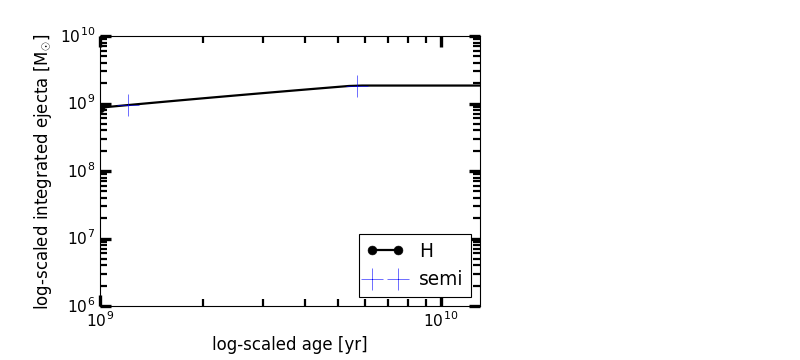

In [152]:
s1_chabrier.plot_mass(fig=3,specie='H',label='H',color='k',shape='-',marker='o',markevery=800)
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
def yields(m,k_N_ch):
    return ( k_N_ch/1.3 * 0.0443*(m**-1.3 - 30.**-1.3) ) * 0.1
yields1=[]
for m1 in m:
    yields1.append(yields(m1,k_N_ch))
plt.plot(ages,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=4)



Simulation should agree with semi-analytical calculations for Chabrier IMF.

## 2. Supernova

The element production due to core-collapse supernova are included in the yields of massive stars.
Supernova Ia have their origin in white dwarfs and their nucleosynthesis products are treated seperately (via a extra yield table loaded with the sn1a_table variable).


$N_{Ia} = A_{Ia} * \int_t^{t+\Delta t} f_{WD}(t^{'})\Psi_{Ia}(t^{'})dt^{'} $

In [153]:
s1_snIa=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_on=True,sn1a_rate='maoz',
           imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/agb_and_massive_stars_h1.txt', 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.3s


<IPython.core.display.Javascript object>


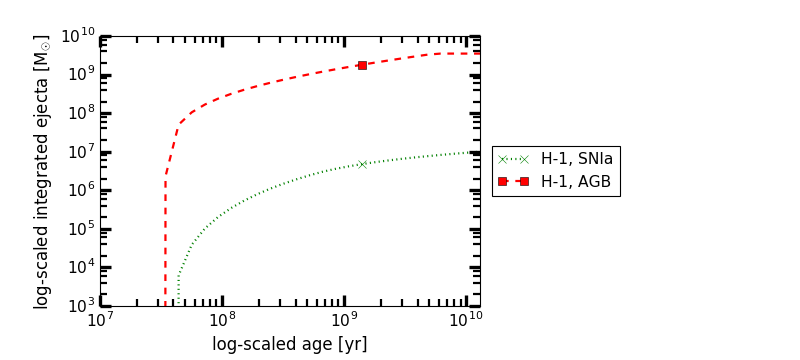

In [154]:
s1_snIa.plot_mass(fig=4,specie='H-1',source='sn1a') 
s1_snIa.plot_mass(fig=4,specie='H-1',source='agb') 

Comparison of total (final) SNIa ejecta of H, H-1 with the total amount of H ejected:

In [155]:
print s1_snIa.history.ism_elem_yield_1a[-1],s1_snIa.history.ism_iso_yield_1a[-1],s1_snIa.history.ism_elem_yield[-1]

[10000000.000000006] [ 10000000.00000001] [3697728129.7192101]


## 3. Basic parameter 

### a) Total mass

Change of the total mass via mgal variable:

In [156]:
s1_1e7=s.sygma(iolevel=0,mgal=1e7,dt=1e7,tend=1.3e10,hardsetZ=0.0001,
               table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn')
s1_1e9=s.sygma(iolevel=0,mgal=1e9,dt=1e9,tend=1.3e10,hardsetZ=0.0001,
               table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.29s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.44s


Final mass fraction of the total ejecta (H only) should not depend on the total mass:

In [157]:
print sum(s1_1e7.history.ism_elem_yield[-1])/1e7,sum(s1_1e9.history.ism_elem_yield[-1])/1e9

0.0170583657213 0.0170583657213


### b) Transition mass

The transition from AGB stars to massive stars, including the super-AGB stage are still not fully understood.

Here we test the difference between the choice of 8Msun and 10Msun.

In [178]:
s1_8=s.sygma(iolevel=0,imf_bdys=[1,30],imf_type='salpeter',transitionmass=8,mgal=1e11,dt=1e7,
             tend=1.3e10,iniZ=0.02,hardsetZ=0.0001,
           table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab_h1.ppn')
s1_10=s.sygma(iolevel=0,imf_bdys=[1,30],imf_type='salpeter',transitionmass=10,mgal=1e11,dt=1e7,
              tend=1.3e10,iniZ=0.02,hardsetZ=0.0001,
           table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab_h1.ppn')
Yield_agb_sim_8=s1_8.history.ism_iso_yield_agb[-1][0]
Yield_agb_sim_10=s1_10.history.ism_iso_yield_agb[-1][0]

SYGMA run in progress..
   SYGMA run completed - Run time: 0.3s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.29s


<IPython.core.display.Javascript object>


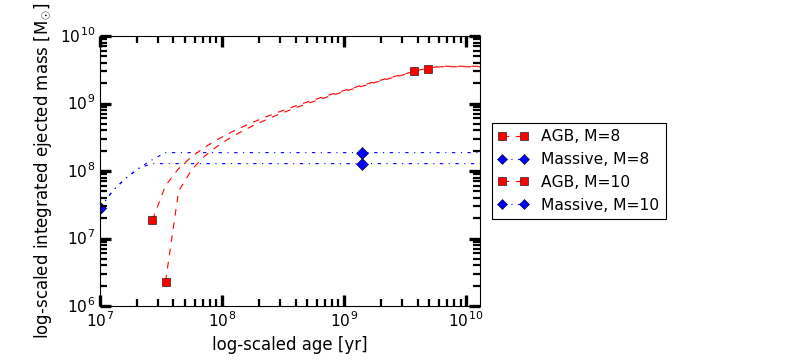

In [180]:
s1_8.plot_totmasses(fig=5,source='agb',label='AGB, M=8')
s1_8.plot_totmasses(fig=5,source='massive',label='Massive, M=8')
s1_10.plot_totmasses(fig=5,source='agb',label='AGB, M=10')
s1_10.plot_totmasses(fig=5,source='massive',label='Massive, M=10')

In [183]:
alphaimf=2.35
k_N_t=1e11*(alphaimf-2.)/ (1.**-(alphaimf-2.) - 30.**-(alphaimf-2.))

N_agb_8=k_N_t/(alphaimf-1.) * (1.**-(alphaimf-1.) - 8.**-(alphaimf-1.))
Yield_agb_8=0.1*N_agb_8

N_agb_10=k_N_t/(alphaimf-1) * (1.**-(alphaimf-1.) - 10.**-(alphaimf-1.))
Yield_agb_10=0.1*N_agb_10

print 'Should be 1:',Yield_agb_sim_8/Yield_agb_8
print 'Should be 1:',Yield_agb_sim_10/Yield_agb_10

Should be 1: 1.0
Should be 1: 1.0


### c) Time resolution

#### First constant timestep size of 1e7; then with special_timesteps 200 log steps.

In [163]:
s1_dt_const=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,special_timesteps=-1,imf_type='salpeter',
           imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn',
          stellar_param_on=False)
s1_dt_log=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,special_timesteps=200,imf_type='salpeter',
           imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/agb_and_massive_stars_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 11.7s
SYGMA run in progress..
   SYGMA run completed - Run time: 1.75s


In [74]:
print 'should be 1 ',s1_dt_const.history.ism_iso_yield[-1][0]/s1_dt_log.history.ism_iso_yield[-1][0]

should be 1  1.0


<IPython.core.display.Javascript object>


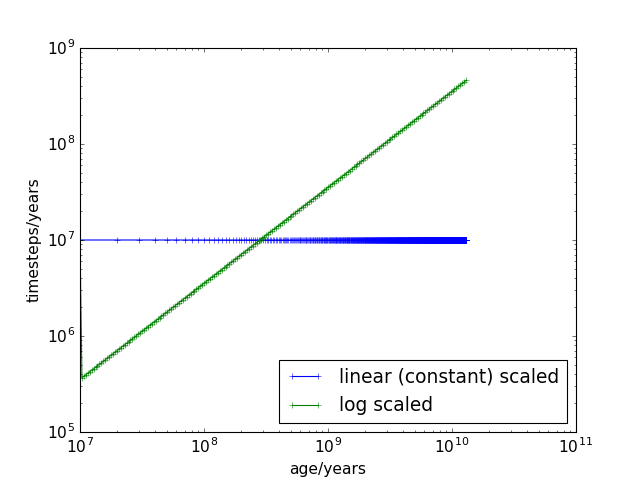

In [166]:
plt.figure(6)
plt.plot(s1_dt_const.history.age[1:],s1_dt_const.history.timesteps,label='linear (constant) scaled',marker='+')
plt.plot(s1_dt_log.history.age[1:],s1_dt_log.history.timesteps,label='log scaled',marker='+')
plt.yscale('log');plt.xscale('log')
plt.xlabel('age/years');plt.ylabel('timesteps/years');plt.legend(loc=4)

Test the total isotopic and elemental ISM matter at first and last timestep.

## 4. Neutron stars

Neutron stars are born from collapsing massive stars. Neutron stars (NS) in binary systems can produce heavy elements due to their highly neutron-rich matter. The the amount of neutron stars is set by different factors while the ejecta per neutron star is set via an input table (variable nsmerger_table).

To calculate the amount of neutron stars $N_{NS}$ in the interval $[t,t+\Delta t]$ one needs

$N_{NS} = A_{NS} \int_t^{t+\Delta t} \Psi_{NS}(t^{'},Z)dt^{'}$

To constrain the formula above the binary fraction of all massive stars, the fraction of merger of massive-star binary systems and the initial mass interval for potential merger need to be known.

In [167]:
s1_ns_merger=s.sygma(mgal=1e11,dt=1e7,iniZ=0.02,hardsetZ=0.02,special_timesteps=-1,
          ns_merger_on=True,f_binary=1.0, f_merger=0.0008, t_merger_max=1.0e10,
                     nsmerger_table = 'yield_tables/r_process_rosswog_2014.txt')
s1_default=s.sygma(mgal=1e11,dt=1e7,iniZ=0.02,hardsetZ=0.02,special_timesteps=-1,ns_merger_on=False,bhns_merger_on=False)

SYGMA run in progress..
   SYGMA run completed - Run time: 22.72s
SYGMA run in progress..
   SYGMA run completed - Run time: 22.49s


The number of NS in time bins of 1e7yrs decrease over time.

<IPython.core.display.Javascript object>


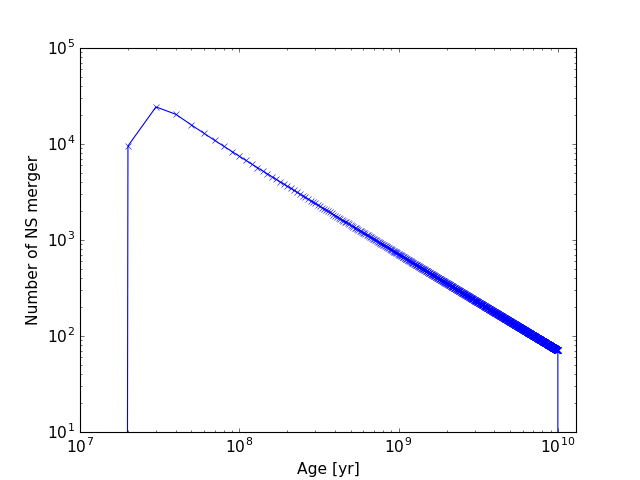

(10000000.0, 13000000000.0)

In [168]:
plt.figure(7)
plt.plot(s1_ns_merger.history.age[1:],s1_ns_merger.nsm_numbers,marker='x')
plt.xscale('log');plt.yscale('log');
plt.ylabel('Number of NS merger'); plt.xlabel('Age [yr]')
plt.xlim(1e7,13e9)

The origin of gold (Au) is not well understood. The most promising candidate are NS merger. By plotting the total ejecta of our SSP with NS and without NS we see the strong contribution of NS to Au.

<IPython.core.display.Javascript object>


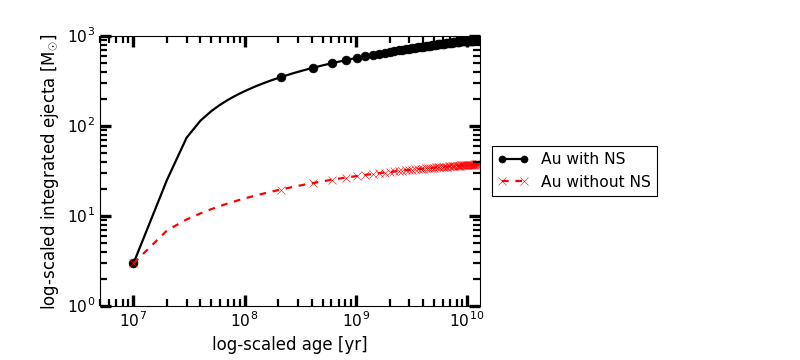

(5000000.0, 13000000000.0)

In [169]:
s1_ns_merger.plot_mass(fig=8,specie='Au',label='Au with NS')
s1_default.plot_mass(fig=8,specie='Au',label='Au without NS',marker='x',color='r',shape='--')
plt.xlim(5e6,13e9)